In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file('../data/parks.geojson')
print(parks.crs)
parks.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
print(parks.loc[0,'geometry'])

MULTIPOLYGON (((-86.95546524763979 36.07930145579854, -86.95577768867267 36.0791390934377, -86.95554165522448 36.07881679726515, -86.95555002481612 36.07876336296327, -86.95547131924887 36.07872072961796, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.07839107173579, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.07829407526238, -86.95521421491281 36.07826638490727, -86.95520846364511 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.07815386881271, -86.95519898519579 36.07812557509128, -86.95519999833 36.07809727154806, -86.95520236476608 36.07806895638105, -86.9552057503346 36.07804090893737, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.07813012168268, -86.95500338104712 36.07803322156244, -86.9550

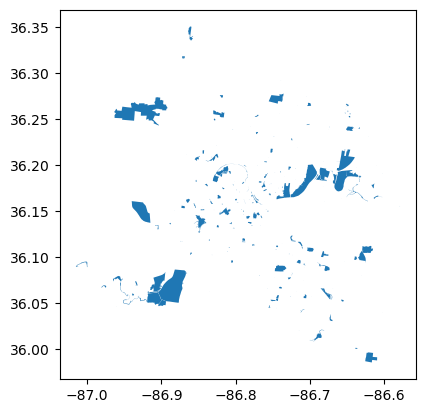

In [5]:
parks.plot();

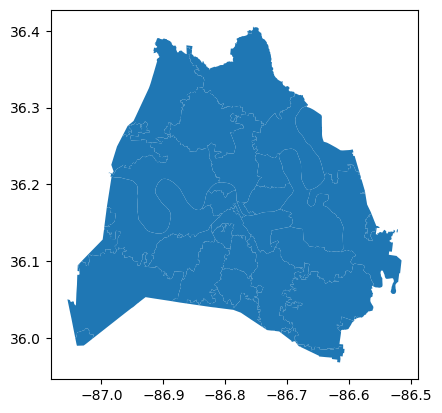

In [6]:
zipcodes.plot();

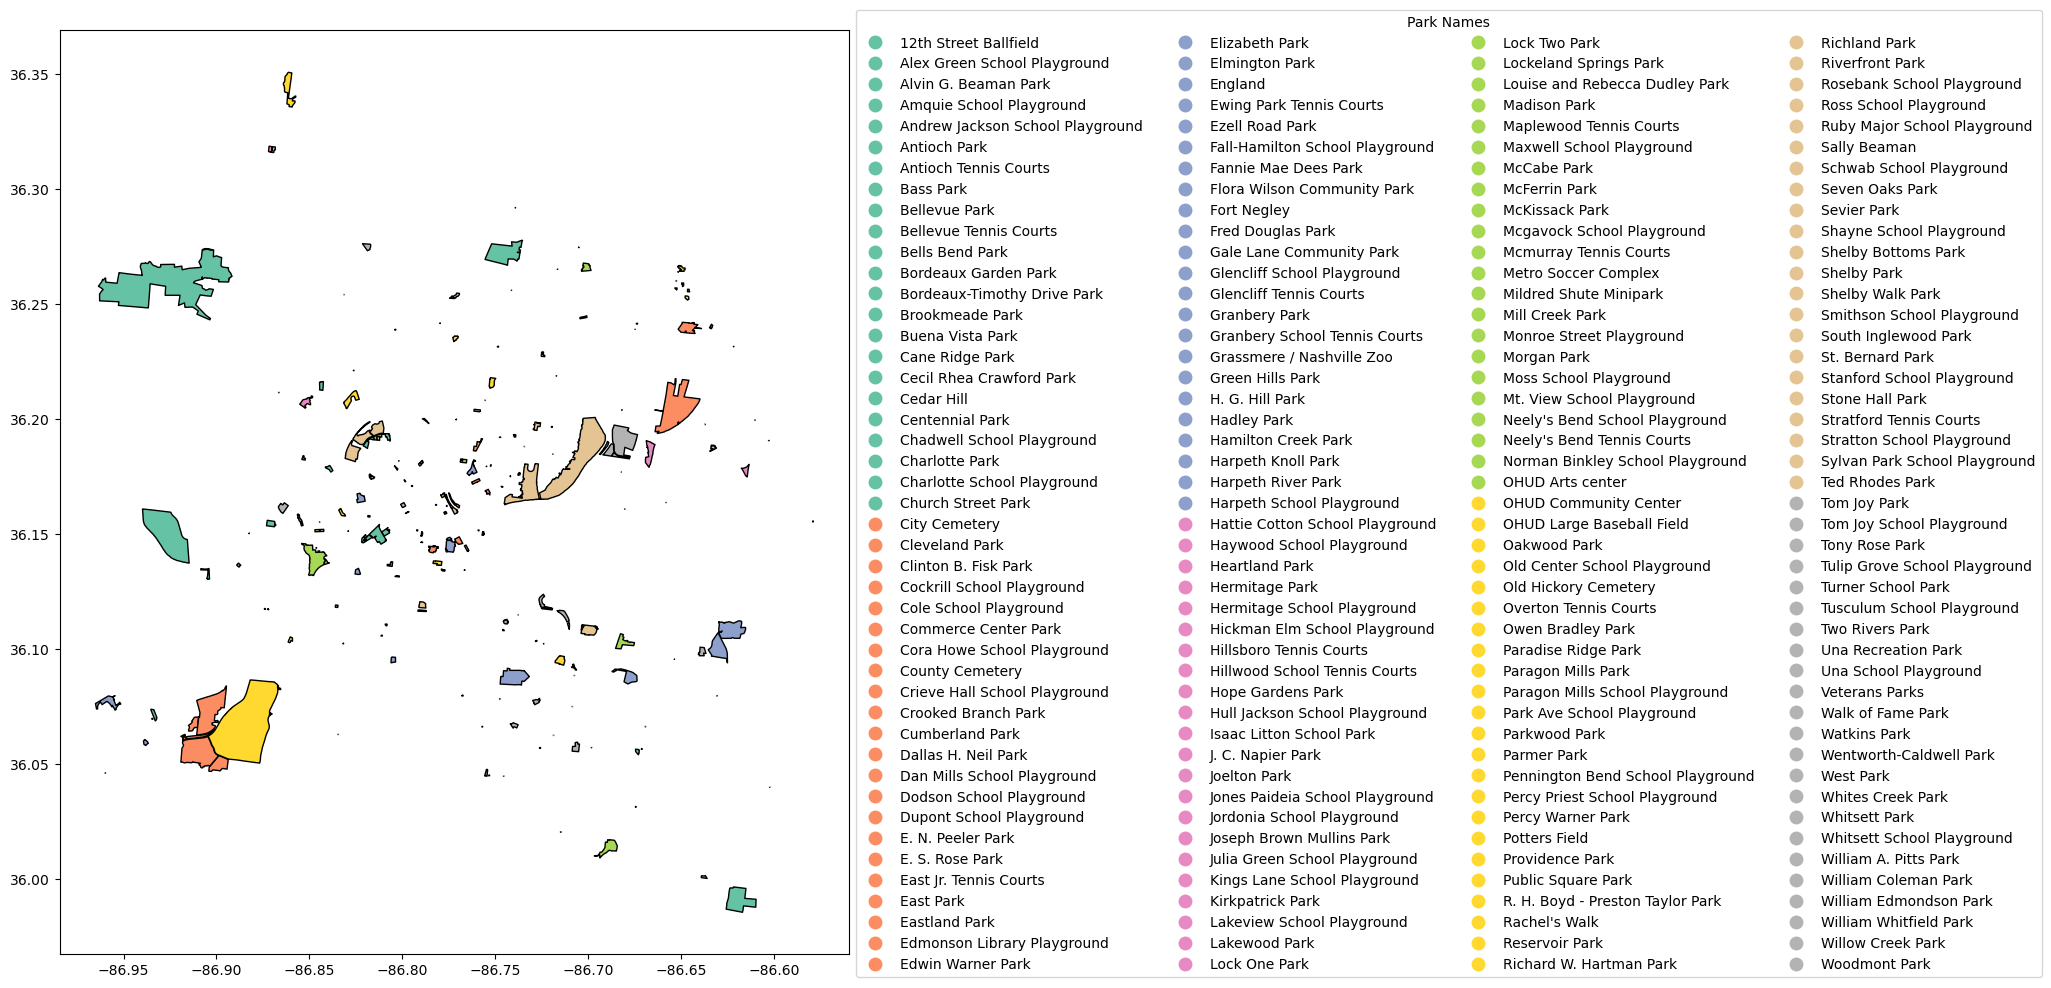

In [12]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Park Names', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 4}

parks.plot(column = 'name', figsize=(12, 12),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

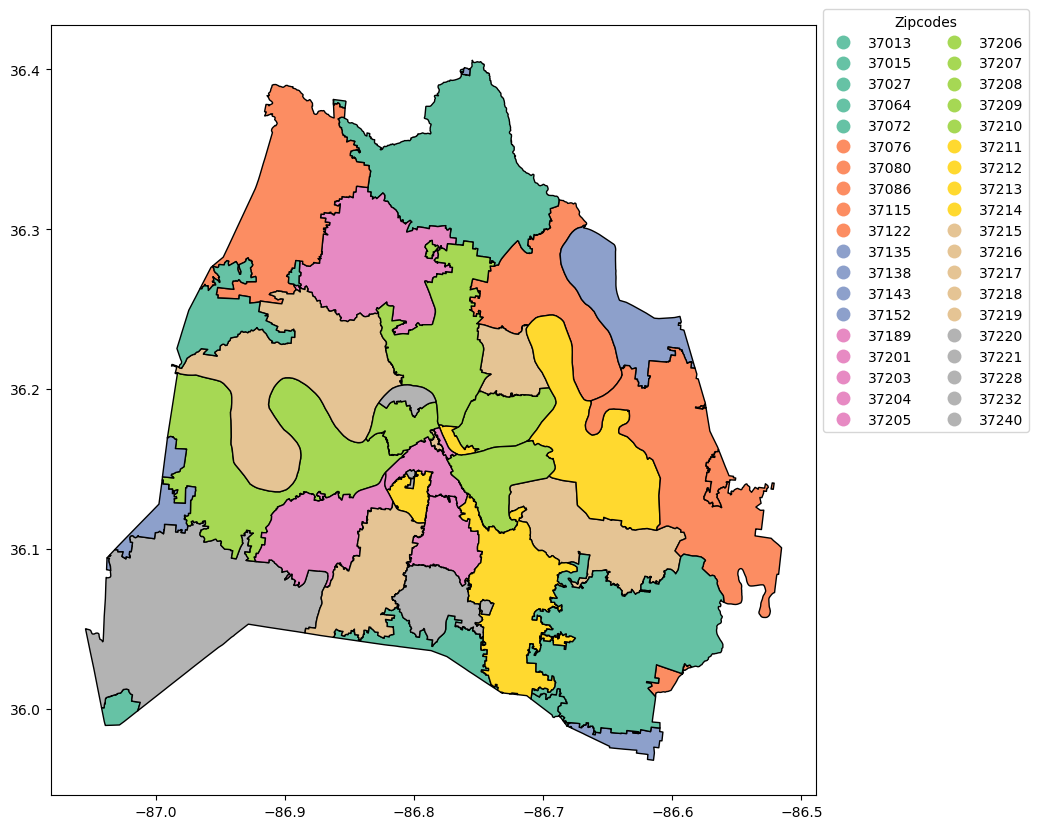

In [10]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [18]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
park_geo = gpd.GeoDataFrame(parks, 
                           crs = zipcodes.crs, 
                           geometry = parks['geometry'])

In [20]:
type(park_geo)

geopandas.geodataframe.GeoDataFrame

In [21]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [22]:
parks_by_zip = gpd.sjoin(park_geo, zipcodes, op = 'within')

/Users/drewthomasson/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [23]:
parks_by_zip.head()

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry,index_right,zip,po_name
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...",7,37221,NASHVILLE
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...",7,37221,NASHVILLE
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...",7,37221,NASHVILLE
127,0.51,Bellevue Tennis Courts,0,Bellevue Tennis Courts,TENNIS,Colice Jeane Rd @ Baugh Rd,0,0,None,"MULTIPOLYGON (((-86.93431 36.07001, -86.93416 ...",7,37221,NASHVILLE
154,0.1,Harpeth School Playground,2002,Harpeth School Playground,PLAYGROUND,Learning Ln @ Collins Rd,0,0,None,"MULTIPOLYGON (((-86.95997 36.04626, -86.95980 ...",7,37221,NASHVILLE


In [25]:
parks_by_zip['zip'].value_counts()

37221    21
37214    19
37208    18
37228    17
37013    16
37211    16
37209    15
37201    13
37206    13
37203    12
37218    12
37138    11
37207    10
37076     9
37205     8
37115     7
37217     6
37210     6
37215     5
37216     4
37204     3
37212     3
37189     3
37220     2
37027     2
37080     2
37219     2
37213     1
37072     1
Name: zip, dtype: int64

In [26]:
parks_in_37203 = parks_by_zip.loc[parks_by_zip['zip'] == '37203']
parks_in_37203.shape

(12, 13)

In [27]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

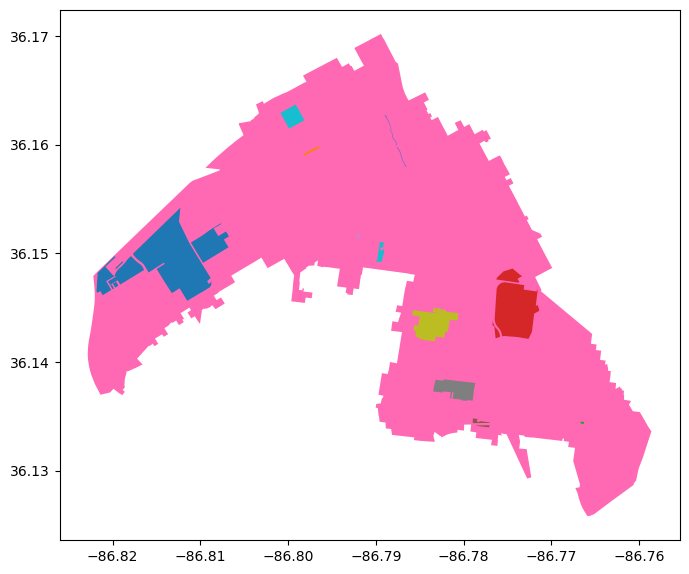

In [31]:
ax = polygon37203.plot(figsize = (8, 10), color = 'hotpink')
parks_in_37203.plot( ax = ax, column = 'common_nam');
plt.show();

In [32]:
polygon37203.geometry.centroid

/var/folders/yk/nlzx2q5s1yx78ng7_bp7xk7w0000gq/T/ipykernel_54309/651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [34]:
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.78898899667411 36.14860232841574)


/var/folders/yk/nlzx2q5s1yx78ng7_bp7xk7w0000gq/T/ipykernel_54309/4090195936.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


In [35]:
area_center = [center.y, center.x]
print(area_center)

[36.14860232841574, -86.7889889966741]


In [36]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

In [38]:
i = 0
for row_index, row_values in parks_in_37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 26
values are:
 
acres                                                       0.59
name                                           Owen Bradley Park
year_estab                                                  1975
common_nam                                          Owen Bradley
status                                                      PARK
address                        1 Music Square E, at Division St.
lon                                                  -86.7919966
lat                                                  36.15160071
descriptio                              Small park with statues.
geometry       (POLYGON ((-86.79228831237084 36.1513915752911...
index_right                                                   35
zip                                                        37203
po_name                                                NASHVILLE
Name: 26, dtype: object
------------------------- 
index is 35
values are:
 
acres                                               

In [40]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

for row_index, row_values in parks_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lonfolium.Map?']]
    pop = str(row_values['common_nam'])
    icon=folium.Icon(color="green",icon="tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')

map_37203

In [41]:
folium.Map?

In [42]:
cluster_map_37203 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37203)

folium.GeoJson(polygon37203).add_to(cluster_map_37203)

# inside the loop add each marker to the cluster
for row_index, row_values in parks_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['common_nam'])
    icon=folium.Icon(color="green",icon="tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37203.save('../maps/cluster37203.html')

cluster_map_37203  

In [43]:
#draw our zip code area: 37203
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#create a list of locations and pass them to FastMarkerCluster()
locations = parks_in_37203[['lat', 'lon']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37203